<a href="https://colab.research.google.com/github/J-Chaudhary/test/blob/master/CISC520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CISC 520-51- B-2020/Late Spring - Data Engineering and Mining**

Student: Jignesh Chaudhary(id.197320), Instructor:  Khaled Iskandarani
# **Final Project**

## **Time Series forcast of financial Instrument**

Time series data collected from the real-life things. we can use this time series data on computer to get graphical and numerical outputs. The output of the analysis tells us more about real-life situation. It can be used to make a prediction of future values. 

The time series is a series of numerical measurement of the same entity taken at equally spaced intervals over time. Time series data can be collected yearly, monthly, weekly, daily, or even hourly.  

Time series data has four aspect of behaviour Trend, Seasonality, Cycles and Unexplained variation. They can also be a irregularities or outliers in the data which can be related back to real-world occurrences. Trend is the overall long term direction of the series. Seasonality occurs when there is a repeated behaviour in the data which occurs a regular intervals. Seasonality is related to seasonal, netural or human behaviour. Cycles occure when the series follows an up and down pattern it is not seasonal. The cycles can be a verying lenght which makes them more difficult to detect then the seasonality. In all data there is random variation, some tome series can be very regular with literal random variation while other may consist of not much else. Some time there is strange dips and jumps in a series these can be du to one-off event such as an economical crices in financial market or recent example is the Corona pendemic which effects the financial markets all over the world. 
There are many computer modules that can help to do the mechanics of time series analysis. It is very important to relate the methematical aspects of the series to the real-life application. This is make time series analysis so interasting.    
There are many python modules available for time series analysis such as numpy, pandas, scipy, scikit learn, Statsmodel, matplotlib and datetime. the models available for forcasting are ARIMA model, fbprophat and many more.

For this final project I am using daily data of Dow Jones Industrial Index (^DJI) from Yahoo finance portal. Yahoo! collects financial data from data vendors. Yahoo! finance is a media property that part of Yahoo!’s network. Yahoo! Finance provides financial news, data and various online tools that can help investors to track their portfolio values and future investment opportunities. 

**Details of collected data**

**Ticker:** Dow Jones Industrial Average (^DJI)

**Primary time unit:** Date


I am using fbprophet module form python to predict the future price of selected financial instrument. 

Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.
The input to Prophet is always a data frame with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric and represents the measurement we wish to forecast.

In [0]:
import pandas as pd          # pandas library
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
import pandas_datareader as web # get data form yahoo
from fbprophet import Prophet # fbprophet model

In [0]:
# Importing data form yahoo finance using pandas datareader 
df = web.DataReader('^DJI', data_source='yahoo', start='2019-04-01', end='2020-06-11')

In [34]:
df.shape

(303, 6)

In [35]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [36]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-01,26280.900391,26071.689453,26075.099609,26258.419922,295570000,26258.419922
2019-04-02,26221.240234,26122.310547,26213.550781,26179.130859,250940000,26179.130859
2019-04-03,26282.169922,26138.470703,26238.029297,26218.130859,271980000,26218.130859
2019-04-04,26398.900391,26212.779297,26213.419922,26384.630859,233040000,26384.630859
2019-04-05,26487.570312,26370.820312,26427.560547,26424.990234,229550000,26424.990234
...,...,...,...,...,...,...
2020-06-05,27338.300781,26836.800781,26836.800781,27110.980469,542310000,27110.980469
2020-06-08,27580.210938,27232.480469,27232.929688,27572.439453,430200000,27572.439453
2020-06-09,27447.369141,27151.060547,27447.369141,27272.300781,381430000,27272.300781


In [37]:
# created Date column using dataframe index
df['Date'] = df.index
df.head(3)

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2019-04-01,26280.900391,26071.689453,26075.099609,26258.419922,295570000,26258.419922,2019-04-01
2019-04-02,26221.240234,26122.310547,26213.550781,26179.130859,250940000,26179.130859,2019-04-02
2019-04-03,26282.169922,26138.470703,26238.029297,26218.130859,271980000,26218.130859,2019-04-03


In [38]:
# create new dataframe with only Date and Close price colum
df=df.loc[:,['Date','Close']]
df.head()

,Date,Close
Date,,
2019-04-01,2019-04-01,26258.419922
2019-04-02,2019-04-02,26179.130859
2019-04-03,2019-04-03,26218.130859
2019-04-04,2019-04-04,26384.630859
2019-04-05,2019-04-05,26424.990234


Text(0.5, 0, 'Date')

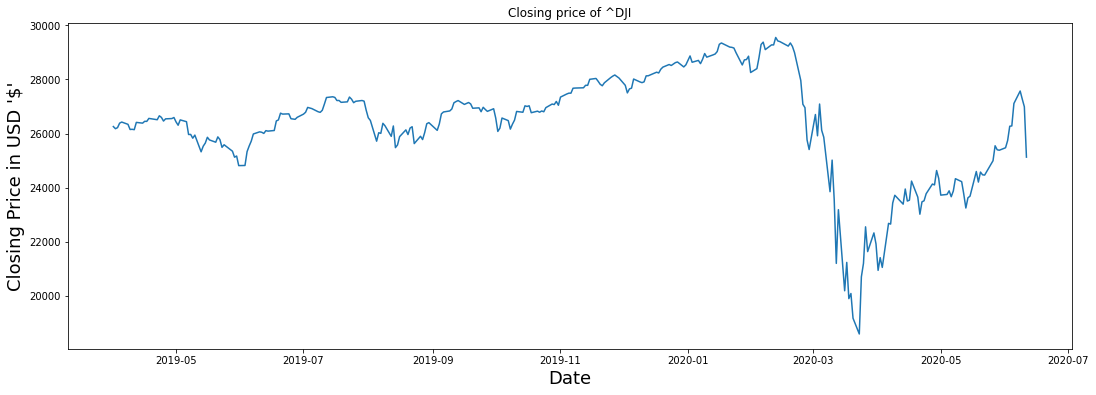

In [39]:
# Ploting the data using pyplot 
plt.figure(figsize=(18,6))
plt.title('Closing price of ^DJI')
plt.plot(df['Close'])
plt.ylabel("Closing Price in USD '$'",fontsize=18)
plt.xlabel("Date", fontsize=18)

In [41]:
# changing the colum name to use with prophet
df.rename(columns = {'Date':'ds', 'Close':'y'}, inplace = True)
df.head(5)

,ds,y
Date,,
2019-04-01,2019-04-01,26258.419922
2019-04-02,2019-04-02,26179.130859
2019-04-03,2019-04-03,26218.130859
2019-04-04,2019-04-04,26384.630859
2019-04-05,2019-04-05,26424.990234


We can fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then we can call its fit method and pass in the historical dataframe.

In [43]:
# Created prophet object and fit the data frame
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
663,2021-06-07,41202.016766,6363.996165,75691.028220
664,2021-06-08,41285.628155,5699.948885,76091.237421
665,2021-06-09,41338.534007,6019.708611,76388.135348
666,2021-06-10,41348.412207,5006.260187,76910.157345
667,2021-06-11,41418.283418,5524.956379,76898.034951


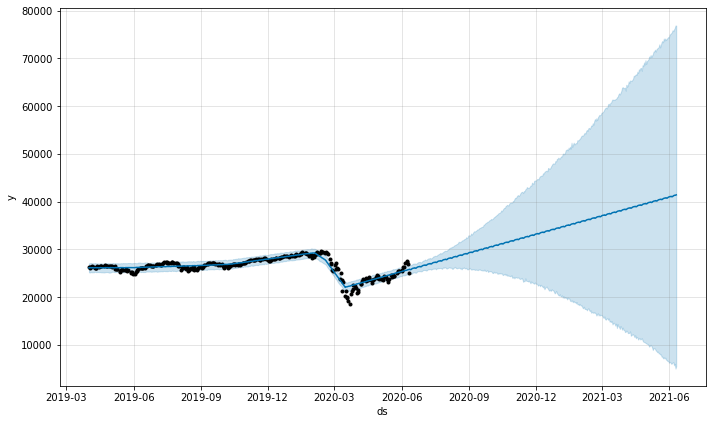

In [52]:
figure1 = m.plot(forecast)

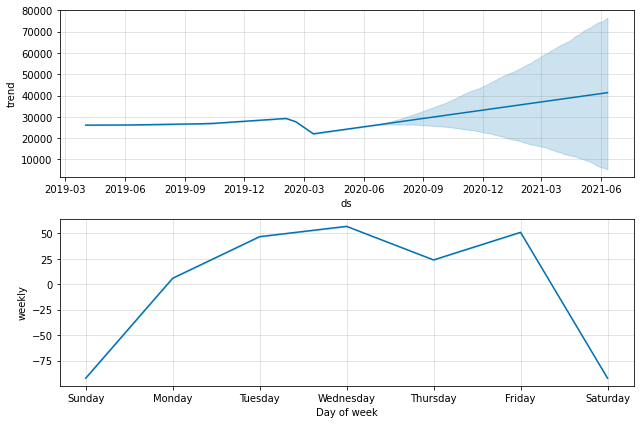

In [53]:
figure2 = m.plot_components(forecast)